<a href="https://colab.research.google.com/github/K-Hebel/WiDS_Chi/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Competion - Data Exploration
by Karen H.

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
data_dict=pd.read_csv("DataDictionaryWiDS2021.csv")
df=pd.read_csv("TrainingWiDS2021.csv")


In [127]:
#dataframe with diabeties positive patients only
df_diabetic = df[df['diabetes_mellitus']==1]

In [123]:
data_dict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0


In [57]:
# Change display setting to show full data set

In [58]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [59]:
target_def=data_dict[data_dict['Variable Name']=='diabetes_mellitus']
target_def

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
180,Target Variable,diabetes_mellitus,None,binary,"Whether the patient has been diagnosed with diabetes mellitus, a chronic disease.",1


In [60]:
cat_col =list(data_dict['Category'].unique())
cat_col

['identifier',
 'demographic',
 'APACHE covariate',
 'vitals',
 'labs',
 'labs blood gas',
 'APACHE comorbidity',
 'Target Variable']

Create dictionary all of the unique categories in data_dict and their corresponding variable name (df column name)

In [61]:

cat_dict={}

for category in cat_col:
  cat_dict[category]= list(data_dict[data_dict['Category'].isin([category, 'Target Variable'])]['Variable Name'].values)


In [62]:
identifier= cat_dict['identifier']
demographic= cat_dict['demographic']
APACHE_covariate= cat_dict['APACHE covariate']
vitals= cat_dict['vitals']
labs= cat_dict['labs']
labs_blood_gas= cat_dict['labs blood gas']
APACHE_comorbidity= cat_dict['APACHE comorbidity']
diabetes= cat_dict['Target Variable']



##Category descriptions and Seaborn Heatmaps to test corrolation of cateory variables to diabetes diagnosis

### **To change the dataset to only view diabetes positive patients use df_diabetic instead of df in the following code.**

,encounter_id,hospital_id,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000
mean,213000.856519,106.102131,0.216285
std,38109.828146,63.482277,0.411712
min,147000.000000,1.000000,0.000000
25%,180001.000000,49.000000,0.000000
50%,213014.000000,112.000000,0.000000
75%,246002.000000,165.000000,0.000000
max,279000.000000,204.000000,1.000000


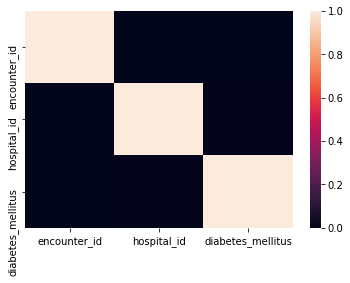

In [126]:
#Correleation for identifier category
sns.heatmap(df[identifier].corr());
df[identifier].describe()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,diabetes_mellitus
count,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,130157.000000
mean,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,83.791104,0.216285
std,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,24.963063,0.411712
min,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,38.600000,0.000000
25%,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,66.500000,0.000000
50%,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,80.000000,0.000000
75%,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,96.800000,0.000000
max,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,186.000000,1.000000


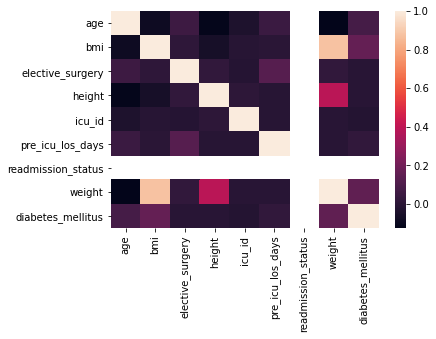

In [69]:
#Correleation for demographic category    Note variable name 'ice_admit_type dropped from category list as it is not contained in df
sns.heatmap(df[demographic].corr());
df[demographic].describe()

,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,diabetes_mellitus
count,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,130157.000000
mean,2.886149,185.492683,565.994296,0.207111,0.027997,1.201222,25.718070,1.481629,0.595735,3.488290,5.484828,0.011441,4.030203,160.141416,99.854530,32.975817,0.156626,87.193046,42.161246,42.161246,132.061737,7.352154,25.150603,137.94526,36.420638,1800.803417,0.330432,12.187662,0.216285
std,0.689812,85.858208,466.510850,0.405238,0.164965,2.351994,20.690041,1.543535,0.262922,0.939831,1.271039,0.106349,1.538528,90.701327,30.759505,6.834576,0.363449,41.908109,12.267414,12.267414,84.958826,0.098423,15.024730,5.30384,0.857584,1456.551481,0.470370,6.931023,0.411712
min,1.200000,101.000000,0.010000,0.000000,0.000000,0.100000,4.000000,0.300000,0.210000,1.000000,1.000000,0.000000,1.000000,39.000000,30.000000,16.200000,0.000000,40.000000,18.000000,18.000000,31.000000,6.960540,4.000000,117.00000,32.100000,0.000000,0.000000,0.900000,0.000000
25%,2.400000,113.000000,204.010000,0.000000,0.000000,0.400000,13.000000,0.710000,0.400000,3.000000,6.000000,0.000000,4.000000,97.000000,87.000000,28.000000,0.000000,54.000000,34.500000,34.500000,77.000000,7.301000,11.000000,135.00000,36.200000,799.048800,0.000000,7.500000,0.000000
50%,2.900000,122.000000,409.020000,0.000000,0.000000,0.700000,19.000000,0.970000,0.500000,4.000000,6.000000,0.000000,5.000000,133.000000,104.000000,33.100000,0.000000,66.000000,40.000000,40.000000,104.000000,7.360000,27.000000,138.00000,36.500000,1454.976000,0.000000,10.470000,0.000000
75%,3.400000,301.000000,703.030000,0.000000,0.000000,1.100000,31.000000,1.530000,0.850000,4.000000,6.000000,0.000000,5.000000,195.000000,120.000000,37.900000,0.000000,124.000000,47.000000,47.000000,156.000000,7.414000,36.000000,141.00000,36.700000,2415.096000,1.000000,15.300000,0.000000
max,4.600000,308.000000,2201.050000,1.000000,1.000000,60.200000,127.000000,11.180000,1.000000,4.000000,6.000000,1.000000,5.000000,598.700000,178.000000,51.400000,1.000000,200.000000,95.000000,95.000000,498.000000,7.590000,60.000000,158.00000,39.700000,8716.669632,1.000000,45.800000,1.000000


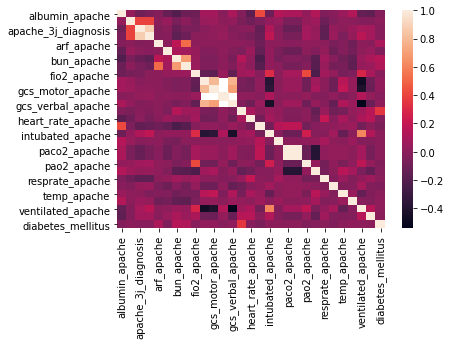

In [71]:
#Correleation for APACHE_covariate category    
sns.heatmap(df[APACHE_covariate ].corr());
df[APACHE_covariate ].describe()

,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,diabetes_mellitus
count,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,130157.000000
mean,79.261563,46.969706,88.575516,49.862989,88.729344,49.917492,103.296794,70.408530,114.432769,62.211596,104.228522,64.353462,104.183969,64.384111,28.719388,12.690841,99.276104,90.366087,153.285373,93.637604,148.231680,96.669649,148.141690,96.690357,37.301433,36.266697,68.522070,56.659665,75.426093,62.494849,75.901589,62.895176,92.457381,83.789773,94.673728,75.973573,91.287108,78.846218,91.254307,79.087347,22.543528,17.084242,98.096905,95.254521,138.223353,114.76978,133.262584,115.951981,133.059136,116.082237,36.722597,36.613964,0.216285
std,21.693320,12.736433,20.162800,13.397152,20.155701,13.427746,21.982940,17.141875,49.182744,17.845442,20.910213,15.433092,20.802509,15.458592,10.567866,5.046519,1.722287,10.150349,31.482818,24.596108,25.897117,20.673004,25.936665,20.692563,0.699406,0.767815,16.270976,14.248823,18.539741,16.305348,18.642800,16.386653,21.783253,20.222465,30.463250,19.112166,20.392222,18.844822,20.410918,18.966473,7.441328,5.933458,3.114242,6.468139,28.924396,27.76802,27.452037,26.315817,27.573246,26.422179,0.773744,0.796852,0.411712
min,37.000000,5.000000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,38.000000,2.000000,60.000000,22.000000,60.000000,22.000000,14.000000,0.000000,0.000000,0.000000,71.000000,10.000000,90.000000,41.000000,90.000000,41.030000,35.100000,31.889000,33.000000,19.000000,37.000000,22.000000,37.000000,22.000000,46.000000,36.000000,35.625000,8.000000,49.000000,32.000000,49.000000,32.000000,10.000000,0.000000,0.000000,0.000000,65.000000,31.44000,75.000000,53.000000,75.000000,53.000000,33.400000,32.900000,0.000000
25%,65.000000,40.000000,75.000000,41.000000,75.000000,41.000000,88.000000,60.000000,89.000000,54.000000,90.000000,54.000000,90.000000,54.000000,22.000000,10.000000,99.000000,89.000000,133.000000,80.000000,130.000000,83.000000,130.000000,83.000000,36.900000,36.100000,58.000000,47.000000,62.000000,51.000000,63.000000,52.000000,77.000000,69.000000,78.000000,64.000000,77.000000,66.000000,77.000000,66.000000,18.000000,13.000000,97.000000,94.000000,119.000000,95.00000,113.000000,97.000000,113.000000,98.000000,36.400000,36.300000,0.000000
50%,76.000000,46.000000,86.000000,50.000000,87.000000,50.000000,101.000000,70.000000,101.000000,62.000000,102.000000,64.000000,102.000000,64.000000,26.000000,13.000000,100.000000,93.

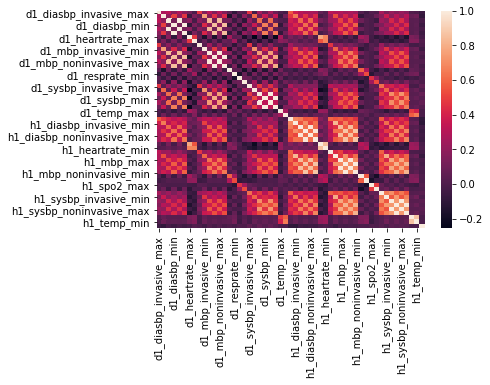

In [72]:
#Correleation for vitals category    
sns.heatmap(df[vitals].corr());
df[vitals].describe()

,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,diabetes_mellitus
count,58751.000000,58751.000000,53422.000000,53422.000000,116423.000000,116423.000000,113465.000000,113465.000000,116884.000000,116884.000000,121914.000000,121914.000000,110110.000000,110110.000000,113925.000000,113925.000000,114569.000000,114569.000000,48944.000000,48944.000000,34654.000000,34654.000000,111600.000000,111600.000000,117611.000000,117611.000000,116887.000000,116887.000000,112728.000000,112728.000000,11152.000000,11152.000000,10296.000000,10296.000000,25167.000000,25167.000000,24236.000000,24236.000000,25373.000000,25373.000000,55084.000000,55084.000000,23762.000000,23762.000000,27367.000000,27367.000000,27201.000000,27201.000000,48944.000000,48944.000000,11690.000000,11690.000000,24428.000000,24428.000000,29336.000000,29336.000000,28376.000000,28376.000000,24171.000000,24171.000000,130157.000000
mean,2.952673,2.883073,1.191379,1.117405,25.578808,23.554154,8.379782,8.164674,1.493531,1.363795,174.149802,114.440310,24.452872,23.192344,11.459810,10.901491,34.555834,32.939299,1.577788,1.463473,2.922075,2.078145,205.892097,194.916355,4.253053,3.929256,139.149448,137.692273,12.539672,11.298567,3.008563,3.007254,1.187979,1.187173,25.631220,25.606374,8.274175,8.265049,1.526582,1.524339,167.702625,158.908794,22.544112,22.486146,11.204166,11.088205,33.731830,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,0.216285
std,0.675606,0.679808,2.319165,2.201525,20.495927,18.708332,0.740098,0.793055,1.525906,1.341642,86.545466,38.217682,4.364990,5.000293,2.149213,2.338048,6.194616,6.806350,0.946477,0.737639,3.057443,2.064291,89.547477,88.121757,0.666942,0.579459,4.827752,4.926242,6.782836,5.924633,0.738170,0.738457,2.375772,2.375223,21.377589,21.360676,0.892787,0.905489,1.572771,1.570070,94.033461,88.298827,5.138495,5.144693,2.350633,2.381224,6.804903,6.963975,0.946477,0.737639,2.898524,2.854953,92.486473,92.692759,0.760183,0.749463,5.711628,5.658036,6.933161,6.915142,0.411712
min,1.200000,1.100000,0.200000,0.200000,4.000000,3.000000,6.200000,5.500000,0.340000,0.300000,73.000000,33.000000,12.000000,7.000000,6.800000,5.300000,20.400000,16.100000,0.900000,0.900000,0.400000,0.400000,27.000000,18.550000,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,1.100000,1.100000,0.200000,0.200000,4.000000,4.000000,5.600000,5.300000,0.330000,0.330000,59.000000,42.000000,6.000000,6.000000,5.100000,5.000000,16.000000,15.500000,0.900000,0.900000,0.400000,0.400000,20.000000,20.000000,2.500000,2.500000,114.000000,114.000000,1.100000,1.089800,0.000000
25%,2.500000,2.400000,0.400000,0.400000,13.000000,12.000000,7.900000,7.700000,0.750000,0.710000,117.000000,91.000000,22.000000,21.000000,9.900000,9.200000,30.000000,28.000000,1.100000,1.100000,1.200000,1.000000,147.000000,136.000000,3.800000,3.600000,137.000000,135.000000,8.000000,7.400000,2.500000,2.500000,0.400000,0.400000,13.000000,13.000000,7.700000,7.700000,0.780000,0.780000,111.000000,106.000000,20.000000,20.000000,9.600000,9.400000,29.000000,28.400000,1.100000,1.100000,1.300000,1.250000,131.000000,130.000000,3.700

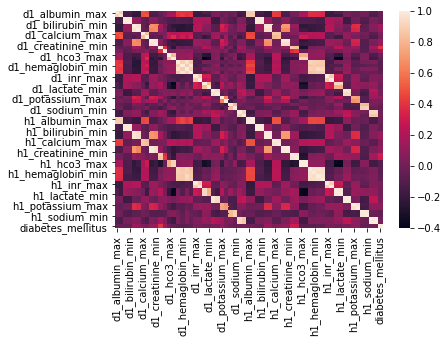

In [73]:
#Correleation for labs category    
sns.heatmap(df[labs].corr());
df[labs].describe()

,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,diabetes_mellitus
count,45696.000000,45696.000000,45350.000000,45350.000000,46147.000000,46147.000000,36818.000000,36818.000000,22491.000000,22491.000000,22308.000000,22308.000000,22712.000000,22712.000000,16760.000000,16760.000000,130157.000000
mean,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0.216285
std,14.623775,10.996254,0.085651,0.111530,107.084058,61.514357,130.319620,119.119675,14.631359,14.052015,0.105930,0.108658,112.646743,100.211935,131.440167,128.562211,0.411712
min,18.400000,14.900000,7.054280,6.890000,39.000000,28.000000,54.800000,36.000000,15.000000,14.997000,6.930000,6.900000,34.000000,31.000000,42.000000,38.000000,0.000000
25%,36.200000,32.000000,7.340000,7.270000,88.000000,68.000000,192.205556,132.000000,36.000000,35.000000,7.290000,7.280000,80.000000,77.000000,144.000000,138.000000,0.000000
50%,42.900000,37.000000,7.390000,7.340000,127.000000,85.000000,275.000000,205.000000,42.000000,41.000000,7.350000,7.340000,119.900000,108.000000,228.125000,218.750000,0.000000
75%,50.000000,43.000000,7.440000,7.398000,206.000000,116.250000,370.000000,300.000000,49.000000,48.000000,7.408000,7.400000,214.000000,182.000000,333.000000,324.000000,0.000000
max,111.000000,85.912000,7.620000,7.557860,540.865000,448.892000,834.805000,604.227778,111.505000,107.000000,7.570000,7.563000,534.905000,514.905000,720.000000,654.813793,1.000000


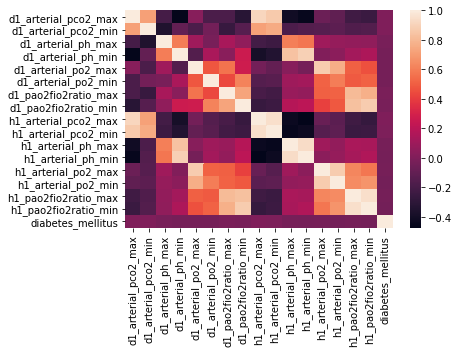

In [75]:
#Correleation for labs_blood_gas category    
sns.heatmap(df[labs_blood_gas].corr());
df[labs_blood_gas].describe()


,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


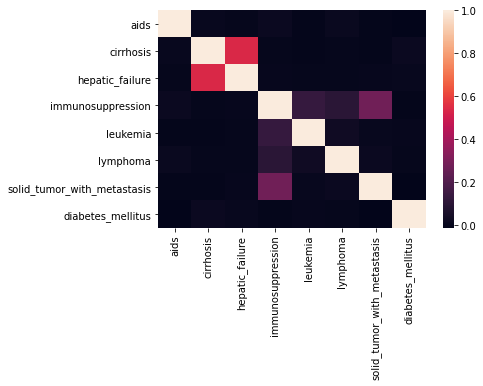

In [77]:
#Correleation for APACHE_comorbidity category    
sns.heatmap(df[APACHE_comorbidity].corr());
df[APACHE_comorbidity].describe()

Porportion of Total Population of identifying as male or female

In [83]:
df.gender.value_counts()/df.gender.count()

M    0.542067
F    0.457933
Name: gender, dtype: float64

Percentage of Training data popolation testing as diabeties positive (total polpulation and by gender)

In [128]:
gender_bkdw= df[['diabetes_mellitus', 'gender']].value_counts()

In [100]:
print('Percentage of females who are diabetic : {:,%}'. format(gender_bkdw[1][1]/(gender_bkdw[1][1]+gender_bkdw[0][1])))

Percentage of females who are diabetic : 21.362026%


In [101]:
print('Percentage of males who are diabetic : {:,%}'. format(gender_bkdw[1][0]/(gender_bkdw[1][0]+gender_bkdw[0][0])))

Percentage of males who are diabetic : 21.866757%


In [105]:
print('Percentage of total Training dataset population who are diabetic : {:,%}'. format((gender_bkdw[1][1]+gender_bkdw[1][0])/(df['gender'].count())))

Percentage of total Training dataset population who are diabetic : 21.635624%


In [108]:
#Population by 'Ethnicity'
df.ethnicity.value_counts()/df.ethnicity.count()

Caucasian           0.779622
African American    0.108198
Other/Unknown       0.048697
Hispanic            0.039270
Asian               0.017096
Native American     0.007117
Name: ethnicity, dtype: float64

### Percentage of total polulation by ethnicity who are diabetic in Training dataset

In [122]:
diabetic_ethnicity=pd.DataFrame(df[df['diabetes_mellitus']==1].ethnicity.value_counts()/df.ethnicity.count())
diabetic_ethnicity

,ethnicity
Caucasian,0.160263
African American,0.028420
Other/Unknown,0.012406
Hispanic,0.009668
Asian,0.004184
Native American,0.002287


In [ ]:
#relationship Analysis
#Corralation Matrix